In [1]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt
import pickle
import scipy.io
import cv2
import os
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [ ]:
def load_images_from_folder(folder):
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            img_name.append(filename)
    return images, img_name

In [ ]:
imgs, img_name = load_images_from_folder('stimuli')

In [ ]:
img_name

In [ ]:
len(scipy.io.loadmat(fn)['Results']['Disp'])

In [ ]:
fn = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/results/S04/FA_Block1.mat'

In [ ]:
len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][63][0])

In [ ]:
fn = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/results/S04/FA_Block1.mat'

for i in range(64):
    gavx, gavy, sttime, entime = [], [], [], []
    
    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

    break

gavx   = np.array(gavx)
gavy   = np.array(gavy)
sttime = np.array(sttime)
entime = np.array(entime)

res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
FixDur = entime - sttime
FixOnset = fixendtimes - FixDur + FixDur*.999

exclude_ind = np.unique([np.where(FixDur < 100)[0][0], np.where(FixOnset < 0)[0][0]])
FixX = np.delete(FixX, exclude_ind)
FixY = np.delete(FixY, exclude_ind)
FixDur = np.delete(FixDur, exclude_ind)
FixOnset = np.delete(FixOnset, exclude_ind)




In [ ]:
image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (ImWidth, ImHeight))
plt.imshow(image)




In [ ]:
image.shape

In [ ]:
scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

In [ ]:

#fixation_history_x = fix_X[i]/3
#print(fixation_history_x)
#fixation_history_y = fix_Y[i]/3
#radius_history = radius[i]/5

#print(fixation_history_x, fixation_history_y, radius_history)

# Create a 2D matrix filled with zeros of size (600, 800)
matrix_size = (1200, 1200)
matrix = np.zeros(matrix_size, dtype=int)

# Call the function to add circles to the matrix
result_matrix = add_circles(matrix, FixY, FixX, FixDur/5)


In [ ]:
plt.imshow(result_matrix)

In [ ]:
FixX(iFix) = round(FixData(iFix).gavx - Results.Disp.Resolution.width./2 + Results.ImWidth/2); 
FixY(iFix) = round(FixData(iFix).gavy - Results.Disp.Resolution.height./2 + Results.ImHeight/2);
FixDur(iFix) = FixData(iFix).entime - FixData(iFix).sttime;
FixOnset(iFix) = Results.FixEndTimes{iIm}(iFix) - FixDur(iFix);
% Bug fix to correct error in fixation onsets
FixOnset(iFix) = FixOnset(iFix) + FixDur(iFix)*.999;

In [2]:
def load_fix_from_folder(folder):
    fix_X = []
    fix_Y = []
    radius = []
    img_name = []
    for filename in os.listdir(folder):
        fix_X.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,4])
        fix_Y.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,5])
        radius.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,6])
        img_name.append(str(scipy.io.loadmat(os.path.join(folder,filename))['currImName'][0][0]) + '.jpg')
        #print(filename)
        #print(img_name)
    return fix_X, fix_Y, radius, img_name

In [32]:
import os

def create_folder(folder_path):
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [4]:
import os

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)


In [4]:
def add_circles(matrix, x_list, y_list, r_list):
    for x, y, r in zip(x_list, y_list, r_list):
        x, y, r = int(x), int(y), int(r)
        for i in range(max(0, y - r), min(matrix.shape[0], y + r + 1)):
            for j in range(max(0, x - r), min(matrix.shape[1], x + r + 1)):
                if (i - y) ** 2 + (j - x) ** 2 <= r ** 2:
                    matrix[i][j] += 1
    return matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

n_f = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(2)/results/'

for q in range(1, 41):

    if q < 10:
        sq = 'S0' + str(q)
    else:
        sq = 'S' + str(q)
    
    x = []
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = n_f + sq
    
    if folder_exists(folder_path):
    
        #fix_X, fix_Y, radius, img_name = load_fix_from_folder('S_fix/S'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        folder_path = '/raid/pranjul/DG3_HG_heatmaps_c_f/' + sq +'_fix_c'
        create_folder(folder_path)

        for file in sorted(os.listdir(n_f + sq)):
            if 'Block' in file:
                print(file)        

                fn = n_f + sq + '/' + file

                for i in range(64):
                    gavx, gavy, sttime, entime = [], [], [], []

                    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
                        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
                        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
                        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
                        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

                    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
                    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
                    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

                    #break

                    gavx   = np.array(gavx)
                    gavy   = np.array(gavy)
                    sttime = np.array(sttime)
                    entime = np.array(entime)

                    res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
                    res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
                    ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
                    ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

                    FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
                    FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
                    FixDur = entime - sttime
                    FixOnset = fixendtimes - FixDur + FixDur*0.999
                    
                    #print(FixDur)
                    #print(FixOnset)
                    dur_indices = np.where(FixDur < 100)[0]
                    onset_indices = np.where(FixOnset < 0)[0]

                    exclude_ind = np.unique(np.concatenate([dur_indices, onset_indices]))
        
                    print(exclude_ind)
                    FixX = np.delete(FixX, exclude_ind)
                    FixY = np.delete(FixY, exclude_ind)
                    FixDur = np.delete(FixDur, exclude_ind)
                    FixOnset = np.delete(FixOnset, exclude_ind)        
            
                    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(2)/stimuli/' + stim_folder_name + '/' + stim_image_name)
                    create_folder(os.path.join(folder_path, stim_folder_name))
                    
                    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (ImWidth, ImHeight))             
                
                    if image is not None and len(FixX) > 3 and len(FixY > 3):

                        # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
                        #fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
                        #fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

                        #print(img_name[i])

                        fixation_history_x = FixX
                        #print(fixation_history_x)
                        fixation_history_y = FixY
                        #radius_history = radius[i]/5

                        #print(fixation_history_x, fixation_history_y, radius_history)

                        # Create a 2D matrix filled with zeros of size (600, 800)
                        matrix_size = (ImWidth, ImHeight)
                        matrix = np.zeros(matrix_size, dtype=int)

                        # Call the function to add circles to the matrix
                        result_matrix = add_circles(matrix, FixX, FixY, FixDur/5)

                        #plt.imshow(result_matrix)
                        #plt.plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        #plt.axis('on')
                        #plt.colorbar(fraction=0.046, pad=0.04)  # Adjust fraction and pad values as needed
                        #plt.tight_layout()

                        # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
                        # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
                        # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
                        centerbias_template = np.load('centerbias_mit1003.npy')

                        # rescale to match image size
                        centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
                        # renormalize log density
                        centerbias -= logsumexp(centerbias)

                        image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                        centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
                        x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
                        y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

                        log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

                        # Scale factor
                        #scale_factor = 3

                        # Calculate the new width and height
                        #new_width = image.shape[1] * scale_factor
                        #new_height = image.shape[0] * scale_factor

                        # Resize the image using cv2.resize()
                        #image = cv2.resize(image, (new_width, new_height))

                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                        x.append((log_density_prediction.detach().cpu().numpy()[0, 0], str(stim_folder_name), str(stim_image_name.split('.')[0]),
                                  sq, result_matrix))

                        f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
                        axs[0].imshow(image)
                        axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[0].set_axis_off()
                        axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
                        axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[1].set_axis_off()
                        axs[2].matshow(result_matrix)
                        axs[2].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[2].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[2].set_axis_off()
                        plt.tight_layout()
                        plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name.split('.')[0] + '.png'))
                        #plt.show()
                        plt.close()
                    #break

                # Open a file in binary write mode
                with open(folder_path + '/' + sq + '.pkl', 'wb') as file:
                    pickle.dump(x, file)

                #break
            #break

Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c' already exists.
S02_Block1.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pa

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces' already exists.
[0 4 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art' already exists.
[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_art_inv' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces_inv' already exists.
S02_Block4.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces_inv' already exists.
[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S02_fix_c/pareidol

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
S03_Block3.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/object

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S03_fix_c/pareidolia_art' al

[0 1 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces' already exists.
[ 0  3 10]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
FA_Block2.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_art_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia' already exists.
[0 3 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pr

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects' already exists.
[0 4 6 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects' already exists.
[0 6 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/object

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S04_fix_c/pareidolia_inv' already exists.
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c' already exists.
FL_Block1.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art_inv' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objec

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces'

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
FL_Block4.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S05_fix_c/pareid

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pare

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/faces' already exists.
MH_Block3.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects_inv' already exists.
[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatma

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/faces' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art_inv' already exists.
[0 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/objects' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S06_fix_c/pareidolia_art' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
S07_Block2.mat
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects' already exists.
[0 1 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0 1 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia' already 

[0 1 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
[0 1 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S07_fix_c/pareidolia_inv' already exists.
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c' created successfully.
S08_Block1.mat
[0]
Folder '/raid/pranjul

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/faces_inv' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/faces' already exists.
[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/faces_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia' already exists.
[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_art' already exists.
[0 1 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_art_inv' already exists.
[0 4 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/pareidolia_art' already exists.
[0 1 2 3 8 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects' already exists.
[ 0  6 10]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects_inv' already exists.
[0 3 4 5 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S08_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatma

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_inv' already exists.
[0 1 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects' created successfully.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fi

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_in

[0 4 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art_inv' already exists.
[0 2 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S09_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exists.
[0]

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_f

[0 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/pareidolia' already exists.
[0 5 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S10_fix_c/faces' already exist

[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_inv' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/faces' already exists.
[0 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects_in

[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/objects_inv' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S11_fix_c/faces

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia' created successfully.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces' already exists.
[0 7 8 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S1

[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_inv' already exists.
[0 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/o

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects' already exists.
[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects' already exists.
[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/pareidolia_art_inv' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S13_fix_c/parei

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art_inv' already exists.
[0 1 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces' already exists.
[0 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_inv' a

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces_inv'

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects' already exists.
[0 2 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art_inv' already exists.
[0 1 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_inv' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S14_fix_c/

[0 2 3 9]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/objects' already exists.
[ 0 11]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/objects' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_art' already exists.
[ 0 11]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pare

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_art_inv' already exists.
[0 2 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0 3]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/faces' already exists.
[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S15_fix_c/objects_inv' al

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects_inv' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[0 8]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranj

[0 6]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects' already exists.
[0 3 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art_inv'

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[0 2]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S16_fix_c/faces_inv' already exists.
[

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects_inv' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0 3 4]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_art_

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects_inv' already exists.
[0 5]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' al

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/faces_inv' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S17_fix_c/pareidolia_art' already exi

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatm

[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidolia_art' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S18_fix_c/pareidol

[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/faces' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/objects' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/pareidolia_art_inv' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/pareidolia_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/objects' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/objects' already exists.
[0 7]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/pareidolia' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/objects_inv' created successfully.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/objects_inv' already exists.
[0]
Folder '/raid/pranjul/DG3_HG_heatmaps_c_f/S19_fix_c/faces

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)

#image = face()

n_f = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/results/S'

for q in range(10, 40):
    
    x = []
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = n_f + str(q)
    
    if folder_exists(folder_path):
    
        #fix_X, fix_Y, radius, img_name = load_fix_from_folder('S_fix/S'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        #folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit Pareidolie/DG1_HG_heatmaps/S'+ str(q) +'_fix_h'
        folder_path = '/raid/pranjul/DG1_HG_heatmaps_c/S'+ str(q) +'_fix_c'
        create_folder(folder_path)

        for file in sorted(os.listdir(n_f + str(q))):
            if 'Block' in file:
                print(file)        

                fn = n_f + str(q) + '/' + file

                for i in range(64):
                    gavx, gavy, sttime, entime = [], [], [], []

                    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
                        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
                        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
                        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
                        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

                    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
                    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
                    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

                    #break

                    gavx   = np.array(gavx)
                    gavy   = np.array(gavy)
                    sttime = np.array(sttime)
                    entime = np.array(entime)

                    res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
                    res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
                    ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
                    ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

                    FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
                    FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
                    FixDur = entime - sttime
                    FixOnset = fixendtimes - FixDur + FixDur
                    
                    #print(FixDur)
                    #print(FixOnset)
                    dur_indices = np.where(FixDur < 100)[0]
                    onset_indices = np.where(FixOnset < 0)[0]

                    exclude_ind = np.unique(np.concatenate([dur_indices, onset_indices]))
        
                    print(exclude_ind)
                    FixX = np.delete(FixX, exclude_ind)
                    FixY = np.delete(FixY, exclude_ind)
                    FixDur = np.delete(FixDur, exclude_ind)
                    FixOnset = np.delete(FixOnset, exclude_ind)        
            
                    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name)
                    create_folder(os.path.join(folder_path, stim_folder_name))
                    #print(stim_image_name)
                    #print(image.shape)
                    
                    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (ImWidth, ImHeight))
                    #print(image.shape)
                
                    if image is not None and len(FixX) > 3 and len(FixY > 3):

                        # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
                        #fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
                        #fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

                        #print(img_name[i])

                        fixation_history_x = FixX
                        #print(fixation_history_x)
                        fixation_history_y = FixY
                        #radius_history = radius[i]/5

                        #print(fixation_history_x, fixation_history_y, radius_history)

                        # Create a 2D matrix filled with zeros of size (600, 800)
                        matrix_size = (ImHeight, ImWidth)
                        matrix = np.zeros(matrix_size, dtype=int)

                        # Call the function to add circles to the matrix
                        result_matrix = add_circles(matrix, FixX, FixY, FixDur/1.5)

                        #plt.imshow(result_matrix)
                        #plt.plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        #plt.axis('on')
                        #plt.colorbar(fraction=0.046, pad=0.04)  # Adjust fraction and pad values as needed
                        #plt.tight_layout()

                        # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
                        # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
                        # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
                        centerbias_template = np.load('centerbias_mit1003.npy')

                        # rescale to match image size
                        centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
                        # renormalize log density
                        centerbias -= logsumexp(centerbias)

                        #image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                        #centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
                        #x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
                        #y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

                        #log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)
                        
                        image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                        centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

                        log_density_prediction = model(image_tensor, centerbias_tensor)
                        
                        

                        # Scale factor
                        #scale_factor = 3

                        # Calculate the new width and height
                        #new_width = image.shape[1] * scale_factor
                        #new_height = image.shape[0] * scale_factor

                        # Resize the image using cv2.resize()
                        #image = cv2.resize(image, (new_width, new_height))

                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                        x.append((log_density_prediction.detach().cpu().numpy()[0], str(stim_folder_name), str(stim_image_name.split('.')[0]),
                                  'S' + str(q), result_matrix))

                        f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
                        axs[0].imshow(image)
                        axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[0].set_axis_off()
                        #axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
                        axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0])  # first image in batch, first (and only) channel
                        #axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        #axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[1].set_axis_off()
                        axs[2].matshow(result_matrix)
                        axs[2].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[2].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[2].set_axis_off()
                        plt.tight_layout()
                        plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name.split('.')[0] + '.png'))
                        #plt.show()
                        plt.close()
                    #break

                # Open a file in binary write mode
                with open(folder_path + '/' + 'S' + str(q) + '.pkl', 'wb') as file:
                    pickle.dump(x, file)

                #break
            #break

Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c' created successfully.
S10_Block1.mat
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' created successfully.
[3 4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' created successfully.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia' created successfully.
[2 3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects' created successfully.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' already exists.
[2 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' already exists.
[6 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' already exists.
[7 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' already exists.
[]
Folder '/raid/pr

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S10_fix_c/faces_inv' already exists.
[2]
Folder '/raid/pra

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' already exists.
[]
Folder '/

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[0]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_inv' already exists.
[0 1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' alrea

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S11_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/p

[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_art_inv' already exists.
[7 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_art' already exists.
[1 5 6 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects_inv' already exists.
[ 4  6  7  8  9 10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_art' already exists.
[ 3  4  5  7  8  9 10 11 12 13]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia' already exists.
[ 3  5  6  7  8 11 12]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects_inv' already exists.
[2 4 5 6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/faces' already exists.
[ 2  3  4  5  7  9 10 13]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects_inv' already exists.
[2 3 4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareid

[0]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_art_inv' already exists.
[2 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects_inv' already exists.
[4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_inv' already exists.
[4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia' already exists.
[4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/faces_inv' already exists.
[1 2 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_inv' already exists.
[1 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/faces' already exists.
[2 4 5 6 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/objects' already exists.
[3 4 5 6 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/faces' already exists.
[2]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/pareidolia_inv' already exists.
[3 4 5 6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S12_fix_c/f

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' created successfully.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces' already exists.
[7 8 9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_inv' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces_inv' already exists.
[]
Folder '/raid/p

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[2]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[2 3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/faces_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S13_fix_c/pareidolia_art'

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art_inv' already exists.
[1 4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_inv' already exists.
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/objects_inv' already exists.

[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_inv' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces' already exists.
[

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_inv' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S14_fix_c/faces' already exists.
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c' created successfully.
S15_Block1.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces' created successfully.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia' created successfully.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces_inv' created su

[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art_inv' already exists.
[11]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects_inv' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces' already exists.
[4 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces_inv' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_inv' already exists.
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_inv' already exists.
[1 9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art' already exis

S15_Block4.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art_inv' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/faces' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S15_fix_c/pareidolia_

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces_inv' already exists.
[8 9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia' already exists.
[8]
Folder '

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/objects_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/objects' already exists.
[7 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S16_fix_c/objects_inv' already exists.
[]
Folder '

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art' already exists.
[7]


[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces_inv' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S17_fix_c/pareidolia_art' already exists.
[]
Fo

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces' already exists.
S18_Block3.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exist

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exists.
[3 4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S18_fix_c/pareidolia_inv' already exists.
[]


[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art_inv' already exists.
S19_Block2.mat
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces' already exists.

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S19_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/D

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' created successfully.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces_inv' created successfully.
[3 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces' already exists.
[3]
Folder '/raid/pranjul/D

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces' already exists.
[4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_inv' already exists.
[]
F

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art_inv' already exists.
[7 8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S20_fix_c/faces_inv' already exists.
[]


[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pran

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[2]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S21_fix_c/faces_inv' already exists.
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c' created successfully.
S22_Block1.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/faces_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_inv' created succes

[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art_inv' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/faces' already exists.
[1]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/faces' already exists.
[0]
Folder '/raid/pran

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art_inv' already exists.
[5 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
S22_Block4.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/faces_inv' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art_inv' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S22_fix_c/pareidolia' al

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces_inv' already exists.
[]
F

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art_inv' already exists.
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces' already exists.
[]


[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_art' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S23_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pra

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces_inv' already exists.
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects' already exists.
[10]
Folder '/ra

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia' already exists.
[ 7 11]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces' already exists.
[9]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S24_fix_c/pareidolia_art' already exists.
[]
Folder '

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[11]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranju

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[2]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[5 6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
Folde

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/faces_inv' already exists.
[3 4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art_inv' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[5 6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S25_fix_c/pareidolia' already exists.
[]
F

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects_inv' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces' already exists.
S26_Block2.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects' already exists.
[]
Folder '/ra

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/objects' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_art' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/pareidolia_inv' already exists.
[]
Fol

[2 4 5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S26_fix_c/faces' already exists.
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c' created successfully.
S27_Block1.mat
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_inv' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces' created successfully.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/face

[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia' already e

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S27_fix_c/faces_inv' already exists.
[]
Folde

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces_inv' already exists.
[0]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art_inv' already exists.
[8]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces_inv' already exists.
[ 2 11]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatma

[0]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects' already exists.
[5]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_h

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/faces' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S28_fix_c/pareidolia' already 

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/objects' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art_inv' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia' already exists.
[1 6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art' already exists.
[]


[2 7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/objects' already exists.
[2 3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/faces' already exists.
[6]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia_inv' already exists.
[3]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/pareidolia' already exists.
S29_Block4.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S29_fix_c/

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces_inv' already exists.
[7]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[4]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia' already exists.


[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[10]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects' already exists.
S30_Block3.mat
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid

[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/objects_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/faces_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_inv' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art' already exists.
[]
Folder '/raid/pranjul/DG1_HG_heatmaps_c/S30_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/

In [ ]:
np.shape(x)

In [ ]:
32*8

In [1]:
x_loaded = {}

In [5]:
for q in range(1, 41):

    if q < 10:
        sq = 'S0' + str(q)
    else:
        sq = 'S' + str(q)

    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = '/raid/pranjul/DG3_HG_heatmaps_c_f/'+ sq +'_fix_c'
    
    if folder_exists(folder_path):
        # Open a file in binary write mode
        with open('/raid/pranjul/DG3_HG_heatmaps_c_f/'+ sq +'_fix_c/' + sq + '.pkl', 'rb') as file:
            x_loaded[q] = pickle.load(file)

#x_loaded = [x.tolist() for x in x_loaded]

In [6]:
len(x_loaded)

38

In [11]:
x_loaded

{2: [(array([[-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
           -24.27501156, -24.27501156],
          [-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
           -24.27501156, -24.27501156],
          [-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
           -24.27501156, -24.27501156],
          ...,
          [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
           -20.98447538, -20.98447538],
          [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
           -20.98447538, -20.98447538],
          [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
           -20.98447538, -20.98447538]]),
   'objects_inv',
   '64_match_inv',
   'S02',
   array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]])),
  (array([[-24.42721179, -24.4272

In [12]:
x_loaded[2]

[(array([[-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
          -24.27501156, -24.27501156],
         [-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
          -24.27501156, -24.27501156],
         [-21.15202717, -21.15202717, -21.15202717, ..., -24.27501156,
          -24.27501156, -24.27501156],
         ...,
         [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
          -20.98447538, -20.98447538],
         [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
          -20.98447538, -20.98447538],
         [-24.85131845, -24.85131845, -24.85131845, ..., -20.98447538,
          -20.98447538, -20.98447538]]),
  'objects_inv',
  '64_match_inv',
  'S02',
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])),
 (array([[-24.42721179, -24.42721179, -24.42721179, ..., -2

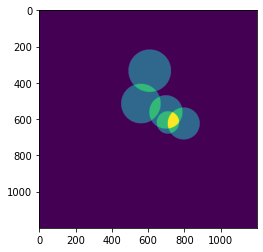

In [7]:
plt.imshow(x_loaded[2][0][4])

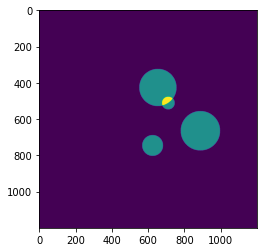

In [8]:
plt.imshow(x_loaded[4][0][4])

In [ ]:
256*37

In [ ]:
for i in range(2):
    print(f"Iter:{i+1}")


In [47]:
import pandas as pd

# Assuming x_loaded is a dictionary
data_frames = []

for key, value in x_loaded.items():
    df = pd.DataFrame(value, columns=['dg3', 'stim_folder', 'stim_name', 'sub', 'hg'])
    data_frames.append(df)

# Concatenate DataFrames
df = pd.concat(data_frames, ignore_index=True)

# Display the resulting DataFrame
print(df)


                                                    dg3     stim_folder  \
0     [[-21.152027166505572, -21.152027166505572, -2...     objects_inv   
1     [[-24.42721179339024, -24.42721179339024, -24....  pareidolia_inv   
2     [[-20.15210146070397, -20.15210146070397, -20....  pareidolia_art   
3     [[-20.831238129584108, -20.831238129584108, -2...  pareidolia_inv   
4     [[-19.815947016302513, -19.815947016302513, -1...  pareidolia_art   
...                                                 ...             ...   
9268  [[-22.03321241376546, -22.03321241376546, -22....     objects_inv   
9269  [[-19.347163086500547, -19.347163086500547, -1...  pareidolia_inv   
9270  [[-21.903876777401155, -21.903876777401155, -2...         objects   
9271  [[-19.344543903988814, -19.344543903988814, -1...       faces_inv   
9272  [[-24.540420183685622, -24.540420183685622, -2...  pareidolia_inv   

         stim_name  sub                                                 hg  
0     64_match_inv  S0

In [10]:
df_agg_hg = df.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()


In [36]:
df_agg_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  
0    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
1    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
2    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
3    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
4    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
..                                                 ...  
251  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
252  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
253  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
254  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
255  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  

[256 rows x 3 columns]

In [12]:

import base64
# Define a function to serialize the 2D arrays
def serialize_array(arr):
    return base64.b64encode(pickle.dumps(arr)).decode('utf-8')

# Apply the serialization function to the column
df_agg_hg['hg'] = df_agg_hg['hg'].apply(serialize_array)

# Save the DataFrame to a CSV file
df_agg_hg.to_csv('/raid/pranjul/agg_hg_38_subs_c.csv', index=False)

In [57]:
import base64
import pandas

# Load the DataFrame from the CSV file
loaded_df_csv = pd.read_csv('/raid/pranjul/agg_hg_38_subs_c.csv')

# Define a function to deserialize the 2D arrays
def deserialize_array(serialized_arr):
    return pickle.loads(base64.b64decode(serialized_arr.encode('utf-8')))

# Apply the deserialization function to the column
loaded_df_csv['hg'] = loaded_df_csv['hg'].apply(deserialize_array)

# Now, loaded_df contains the original DataFrame with 2D arrays in 'Array_Column'

In [58]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
..                                                 ...  
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[256 rows x 3 columns]

In [59]:
loaded_df_csv['hg'][0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:



for i in range(len(df_agg_hg)):
    
    stim_folder_name = df_agg_hg['stim_folder'][i]
    stim_image_name = df_agg_hg['stim_name'][i]
        
    folder_path = '/raid/pranjul/agg_hg_38_subs_c_f/'
    
    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name + '.tif')
    create_folder(os.path.join(folder_path, stim_folder_name))

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (1200, 1200))  
    
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(loaded_df_csv['hg'][i], cmap = 'viridis')  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name.split('.')[0] + '.png'))
    #plt.show()
    plt.close()
    
    
    
    #break

Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/faces' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f

Folder '/raid/pranjul/agg_hg_38_subs_c_f/objects_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/objects_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/objects_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/objects_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/objects_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' created successfully.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia' already exists.
Folder '/raid/pranjul/a

Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia_inv' already exists.
Folder '/raid/pranjul/agg_hg_38_subs_c_f/pareidolia

In [13]:
sp_corr = []
for i in range(len(df['dg3'])):
    sp_corr.append(spearmanr(df['dg3'][i].flatten(), df['hg'][i].flatten())[0])
    #break


In [14]:
import pickle

# Save the list to a file
with open('/raid/pranjul/sp_corr_dg3_38_subs_c.pkl', 'wb') as file:
    pickle.dump(sp_corr, file)

In [12]:
import pickle

# Load the list from the file
with open('/raid/pranjul/sp_corr_dg3_38_subs_c.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

print(loaded_list)

[0.4126834933469937, 0.19952190239697526, 0.4552736506859629, 0.2714146239526068, 0.3903274968066297, 0.3160820247883194, 0.32888795660546866, 0.3213699423542342, 0.33469992183574515, 0.24491788202101464, 0.26629100432610076, 0.3174747626699126, 0.31019026160953594, 0.19135833033326022, 0.3468278157740977, 0.3893307362751329, 0.35025363910213003, 0.21363572189154986, 0.23613098138506164, 0.29683270325349725, 0.25290265885155094, 0.31387255941760056, 0.35049452824550625, 0.35890855429836654, 0.3601730151145099, 0.31788454189088594, 0.374563479493914, 0.2999380745143849, 0.24790131765697618, 0.3311077938175594, 0.24790158204871962, 0.3040572696069852, 0.27855778584341995, 0.5119275320408359, 0.2335354854604329, 0.2850810340156062, 0.41873302691127817, 0.27899915610463033, 0.24665888953282236, 0.20284844851313666, 0.3245871107115927, 0.32070933531455303, 0.2800507086649562, 0.3846041724239579, 0.26449017621533105, 0.30803635923819817, 0.34765351617611945, 0.27868601508696234, 0.2991229443

In [13]:
df

dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
9204  [[-22.03320704181483, -22.03320704181483, -22....     objects_inv   
9205  [[-19.347162311089896, -19.347162311089896, -1...  pareidolia_inv   
9206  [[-21.903870228837253, -21.903870228837253, -2...         objects   
9207  [[-19.344542363086855, -19.344542363086855, -1...       faces_inv   
9208  [[-24.540417387594943, -24.540417387594943, -2...  pareidolia_inv   

         stim_name  sub                                                 hg  
0               64  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1           56_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2           face31  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         16_match  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4           46_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...            ...  ...                                                ...  
9204  74_match_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9205        15_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9206      39_match  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9207    face12_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
9208        06_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[9209 rows x 5 columns]

In [15]:
# Add the Spearman correlation values to the DataFrame
df['sp_corr'] = sp_corr

In [14]:
# Add the Spearman correlation values to the DataFrame
df['sp_corr'] = loaded_list

In [16]:
df = df.drop(columns=['dg3', 'hg'])

In [17]:
len(df['sp_corr'])

9273

In [18]:
df

stim_folder     stim_name  sub   sp_corr
0        objects_inv  64_match_inv  S02  0.344815
1     pareidolia_inv        57_inv  S02  0.411653
2     pareidolia_art   par_gaze_05  S02  0.337549
3     pareidolia_inv        17_inv  S02  0.300548
4     pareidolia_art   par_gaze_18  S02  0.244066
...              ...           ...  ...       ...
9268     objects_inv  74_match_inv  S40  0.308285
9269  pareidolia_inv        15_inv  S40  0.120672
9270         objects      39_match  S40  0.351032
9271       faces_inv    face12_inv  S40  0.315342
9272  pareidolia_inv        06_inv  S40  0.302321

[9273 rows x 4 columns]

In [ ]:
result_df

In [19]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
df['stim_folder'] = pd.Categorical(df['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
df_sorted = df.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(df_sorted)

             stim_folder        stim_name  sub   sp_corr
5018               faces           face10  S23  0.419092
8312               faces           face18  S37  0.224739
1903               faces           face09  S10  0.151635
1901               faces           face05  S10  0.317094
5048               faces           face27  S24  0.232844
...                  ...              ...  ...       ...
4758  pareidolia_art_inv  par_gaze_32_inv  S22  0.292480
2809  pareidolia_art_inv  par_gaze_32_inv  S15  0.273958
1676  pareidolia_art_inv  par_gaze_24_inv  S09  0.324083
2808  pareidolia_art_inv  par_gaze_14_inv  S15  0.205328
6164  pareidolia_art_inv  par_gaze_06_inv  S28  0.370491

[9273 rows x 4 columns]


In [25]:
result_df

dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
9204  [[-22.03320704181483, -22.03320704181483, -22....     objects_inv   
9205  [[-19.347162311089896, -19.347162311089896, -1...  pareidolia_inv   
9206  [[-21.903870228837253, -21.903870228837253, -2...         objects   
9207  [[-19.344542363086855, -19.344542363086855, -1...       faces_inv   
9208  [[-24.540417387594943, -24.540417387594943, -2...  pareidolia_inv   

         stim_name  sub                                                 hg  \
0               64  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1           56_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2           face31  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3         16_match  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4           46_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...            ...  ...                                                ...   
9204  74_match_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9205        15_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9206      39_match  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9207    face12_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9208        06_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

       sp_corr  
0     0.412683  
1     0.199522  
2     0.455274  
3     0.271415  
4     0.390327  
...        ...  
9204  0.313032  
9205  0.125720  
9206  0.364061  
9207  0.337078  
9208  0.326822  

[9136 rows x 6 columns]

In [26]:
df['stim_folder']

0           pareidolia
1       pareidolia_inv
2                faces
3              objects
4       pareidolia_inv
             ...      
9204       objects_inv
9205    pareidolia_inv
9206           objects
9207         faces_inv
9208    pareidolia_inv
Name: stim_folder, Length: 9209, dtype: object

In [27]:
df['stim_folder'].value_counts()

objects               1161
pareidolia_art        1159
objects_inv           1154
pareidolia            1154
faces_inv             1148
pareidolia_inv        1148
pareidolia_art_inv    1143
faces                 1142
Name: stim_folder, dtype: int64

In [28]:
result_df['stim_folder'].value_counts()

faces                 1142
faces_inv             1142
objects               1142
objects_inv           1142
pareidolia            1142
pareidolia_inv        1142
pareidolia_art        1142
pareidolia_art_inv    1142
Name: stim_folder, dtype: int64

In [20]:
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# If you don't have a DataFrame, you can create a sample one
# df = pd.DataFrame({'stim_folder': ['objects']*32 + ['faces']*32 + ['pareidolia']*31 + ['pareidolia_art_inv']*31 + ['pareidolia_inv']*31 + ['pareidolia_art']*31 + ['objects_inv']*31 + ['faces_inv']*30})

# Get the unique values and their counts
value_counts = df['stim_folder'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Identify rows to be removed for each unique value
rows_to_remove = []

for stim_folder, count in value_counts.items():
    if count > min_count:
        indices = df[df['stim_folder'] == stim_folder].sample(n=count - min_count).index
        rows_to_remove.extend(indices)

# Remove the identified rows
result_df = df.drop(rows_to_remove)

# Display the result DataFrame
print(result_df)


         stim_folder     stim_name  sub   sp_corr
0        objects_inv  64_match_inv  S02  0.344815
1     pareidolia_inv        57_inv  S02  0.411653
2     pareidolia_art   par_gaze_05  S02  0.337549
3     pareidolia_inv        17_inv  S02  0.300548
4     pareidolia_art   par_gaze_18  S02  0.244066
...              ...           ...  ...       ...
9268     objects_inv  74_match_inv  S40  0.308285
9269  pareidolia_inv        15_inv  S40  0.120672
9270         objects      39_match  S40  0.351032
9271       faces_inv    face12_inv  S40  0.315342
9272  pareidolia_inv        06_inv  S40  0.302321

[9088 rows x 4 columns]


In [21]:
min_count

1136

In [22]:
len(rows_to_remove)

185

In [23]:
from itertools import combinations

# 'Object_and_face_identification'
# Given array
task_array = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Generate all unique combinations of two tasks
combinations_list = list(combinations(task_array, 2))

# Display the result
print(combinations_list)

[('faces', 'faces_inv'), ('faces', 'objects'), ('faces', 'objects_inv'), ('faces', 'pareidolia'), ('faces', 'pareidolia_inv'), ('faces', 'pareidolia_art'), ('faces', 'pareidolia_art_inv'), ('faces_inv', 'objects'), ('faces_inv', 'objects_inv'), ('faces_inv', 'pareidolia'), ('faces_inv', 'pareidolia_inv'), ('faces_inv', 'pareidolia_art'), ('faces_inv', 'pareidolia_art_inv'), ('objects', 'objects_inv'), ('objects', 'pareidolia'), ('objects', 'pareidolia_inv'), ('objects', 'pareidolia_art'), ('objects', 'pareidolia_art_inv'), ('objects_inv', 'pareidolia'), ('objects_inv', 'pareidolia_inv'), ('objects_inv', 'pareidolia_art'), ('objects_inv', 'pareidolia_art_inv'), ('pareidolia', 'pareidolia_inv'), ('pareidolia', 'pareidolia_art'), ('pareidolia', 'pareidolia_art_inv'), ('pareidolia_inv', 'pareidolia_art'), ('pareidolia_inv', 'pareidolia_art_inv'), ('pareidolia_art', 'pareidolia_art_inv')]


In [24]:
len(df['sp_corr'])

9273

In [25]:
df

stim_folder     stim_name  sub   sp_corr
0        objects_inv  64_match_inv  S02  0.344815
1     pareidolia_inv        57_inv  S02  0.411653
2     pareidolia_art   par_gaze_05  S02  0.337549
3     pareidolia_inv        17_inv  S02  0.300548
4     pareidolia_art   par_gaze_18  S02  0.244066
...              ...           ...  ...       ...
9268     objects_inv  74_match_inv  S40  0.308285
9269  pareidolia_inv        15_inv  S40  0.120672
9270         objects      39_match  S40  0.351032
9271       faces_inv    face12_inv  S40  0.315342
9272  pareidolia_inv        06_inv  S40  0.302321

[9273 rows x 4 columns]

In [22]:
df["stim_folder"]

0           pareidolia
1       pareidolia_inv
2                faces
3              objects
4       pareidolia_inv
             ...      
9204       objects_inv
9205    pareidolia_inv
9206           objects
9207         faces_inv
9208    pareidolia_inv
Name: stim_folder, Length: 9209, dtype: object

In [23]:
df["sp_corr"]

0       0.412683
1       0.199522
2       0.455274
3       0.271415
4       0.390327
          ...   
9204    0.313032
9205    0.125720
9206    0.364061
9207    0.337078
9208    0.326822
Name: sp_corr, Length: 9209, dtype: float64

In [29]:
combinations_list

[('faces', 'faces_inv'),
 ('faces', 'objects'),
 ('faces', 'objects_inv'),
 ('faces', 'pareidolia'),
 ('faces', 'pareidolia_inv'),
 ('faces', 'pareidolia_art'),
 ('faces', 'pareidolia_art_inv'),
 ('faces_inv', 'objects'),
 ('faces_inv', 'objects_inv'),
 ('faces_inv', 'pareidolia'),
 ('faces_inv', 'pareidolia_inv'),
 ('faces_inv', 'pareidolia_art'),
 ('faces_inv', 'pareidolia_art_inv'),
 ('objects', 'objects_inv'),
 ('objects', 'pareidolia'),
 ('objects', 'pareidolia_inv'),
 ('objects', 'pareidolia_art'),
 ('objects', 'pareidolia_art_inv'),
 ('objects_inv', 'pareidolia'),
 ('objects_inv', 'pareidolia_inv'),
 ('objects_inv', 'pareidolia_art'),
 ('objects_inv', 'pareidolia_art_inv'),
 ('pareidolia', 'pareidolia_inv'),
 ('pareidolia', 'pareidolia_art'),
 ('pareidolia', 'pareidolia_art_inv'),
 ('pareidolia_inv', 'pareidolia_art'),
 ('pareidolia_inv', 'pareidolia_art_inv'),
 ('pareidolia_art', 'pareidolia_art_inv')]

In [30]:
result_df

dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
9204  [[-22.03320704181483, -22.03320704181483, -22....     objects_inv   
9205  [[-19.347162311089896, -19.347162311089896, -1...  pareidolia_inv   
9206  [[-21.903870228837253, -21.903870228837253, -2...         objects   
9207  [[-19.344542363086855, -19.344542363086855, -1...       faces_inv   
9208  [[-24.540417387594943, -24.540417387594943, -2...  pareidolia_inv   

         stim_name  sub                                                 hg  \
0               64  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1           56_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2           face31  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3         16_match  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4           46_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...            ...  ...                                                ...   
9204  74_match_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9205        15_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9206      39_match  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9207    face12_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9208        06_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

       sp_corr  
0     0.412683  
1     0.199522  
2     0.455274  
3     0.271415  
4     0.390327  
...        ...  
9204  0.313032  
9205  0.125720  
9206  0.364061  
9207  0.337078  
9208  0.326822  

[9136 rows x 6 columns]

In [21]:
df_sorted

NameError: name 'df_sorted' is not defined

In [32]:
result_df

dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
9204  [[-22.03320704181483, -22.03320704181483, -22....     objects_inv   
9205  [[-19.347162311089896, -19.347162311089896, -1...  pareidolia_inv   
9206  [[-21.903870228837253, -21.903870228837253, -2...         objects   
9207  [[-19.344542363086855, -19.344542363086855, -1...       faces_inv   
9208  [[-24.540417387594943, -24.540417387594943, -2...  pareidolia_inv   

         stim_name  sub                                                 hg  \
0               64  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1           56_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2           face31  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
3         16_match  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
4           46_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...            ...  ...                                                ...   
9204  74_match_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9205        15_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9206      39_match  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9207    face12_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
9208        06_inv  S40  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

       sp_corr  
0     0.412683  
1     0.199522  
2     0.455274  
3     0.271415  
4     0.390327  
...        ...  
9204  0.313032  
9205  0.125720  
9206  0.364061  
9207  0.337078  
9208  0.326822  

[9136 rows x 6 columns]

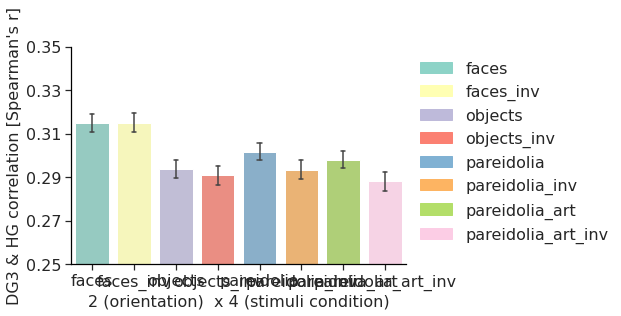

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator
from itertools import cycle

x = "stim_folder"
y = "sp_corr"

# Filter the DataFrame based on the 'Time' condition
subset_df = df_sorted

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

# Create a palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(subset_df[x].unique()))  # You can choose any other colormap

# Create the barplot with the distinct color palette
ax = sns.barplot(data=subset_df, x=x, y=y, palette=palette, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars
#ax = sns.boxplot(data=subset_df, x=x, y=y, palette=palette)  # Added capsize and errwidth for error bars

'''
# Add statistical annotations
annot = Annotator(ax, combinations_list, data=subset_df, x=x, y=y)
annot.new_plot(ax, combinations_list,
               data=subset_df, x=x, y=y)
annot.configure(test='Kruskal', text_format='star', loc='outside',
                comparisons_correction="fdr_bh",
                hide_non_significant=True,
                pvalue_thresholds=[[1e-3, '∗∗∗'], [1e-2, "∗∗"], [0.05, "∗"]], verbose=2)

#annot.apply_test()

# Adjust the position of stars between lines
#annot.line_offset_to_group = 0.5
#annot.line_offset = 0.3  # Adjust this value to move the stars closer to the lines
#annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
#ax, test_results = annot.annotate(line_offset = 0.01)
#ax, test_results = annot.annotate()

ax, test_results = annot.apply_test().annotate(line_offset=0.001)
'''
# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=16)



# Remove x-axis ticks and labels
#ax.set_xticks([])
#ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.25, 0.35)
ax.set_yticks(np.linspace(0.25, 0.35, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('DG3 & HG correlation [Spearman\'s r]', fontsize=16)
#ax.set_ylabel('')
ax.set_xlabel('2 (orientation)  x 4 (stimuli condition)', fontsize=16)

#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
# ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


In [27]:
len(subset_df["stim_folder"].unique()) // 2

4

In [28]:
result_df

stim_folder     stim_name  sub   sp_corr
0        objects_inv  64_match_inv  S02  0.344815
1     pareidolia_inv        57_inv  S02  0.411653
2     pareidolia_art   par_gaze_05  S02  0.337549
3     pareidolia_inv        17_inv  S02  0.300548
4     pareidolia_art   par_gaze_18  S02  0.244066
...              ...           ...  ...       ...
9268     objects_inv  74_match_inv  S40  0.308285
9269  pareidolia_inv        15_inv  S40  0.120672
9270         objects      39_match  S40  0.351032
9271       faces_inv    face12_inv  S40  0.315342
9272  pareidolia_inv        06_inv  S40  0.302321

[9088 rows x 4 columns]

In [81]:
np.mean(np.array(df_sorted[df_sorted['stim_folder'] == 'faces']['sp_corr']))

0.32475074853016833

In [29]:
df_sorted

stim_folder        stim_name  sub   sp_corr
5018               faces           face10  S23  0.419092
8312               faces           face18  S37  0.224739
1903               faces           face09  S10  0.151635
1901               faces           face05  S10  0.317094
5048               faces           face27  S24  0.232844
...                  ...              ...  ...       ...
4758  pareidolia_art_inv  par_gaze_32_inv  S22  0.292480
2809  pareidolia_art_inv  par_gaze_32_inv  S15  0.273958
1676  pareidolia_art_inv  par_gaze_24_inv  S09  0.324083
2808  pareidolia_art_inv  par_gaze_14_inv  S15  0.205328
6164  pareidolia_art_inv  par_gaze_06_inv  S28  0.370491

[9273 rows x 4 columns]

X-coordinates of the centers of the bars:
[-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175]


<Figure size 432x288 with 0 Axes>

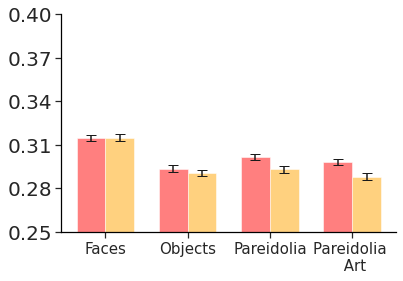

In [54]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Example data (replace these arrays with your own)
data = [
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'faces']['sp_corr'])),  # Group 1 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'objects']['sp_corr'])),  # Group 2 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia']['sp_corr'])),  # Group 3 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_art']['sp_corr']))   # Group 4 data
]

# Example additional data (replace these arrays with your own)
additional_data = [
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'faces_inv']['sp_corr'])),  # Group 1 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'objects_inv']['sp_corr'])),  # Group 2 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_inv']['sp_corr'])),  # Group 3 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_art_inv']['sp_corr'])),   # Group 4 data
]


# Combine the data arrays
all_data = [data, additional_data]

# Calculate means and standard deviations for each set of data
means = [[np.mean(group) for group in dataset] for dataset in all_data]
std_devs = [[np.std(group) / np.sqrt(len(group)) for group in dataset] for dataset in all_data]

# Bar chart with error bars using one standard deviation
fig, ax = plt.subplots()
bar_width = 0.35  # Width of the bars
bar_positions = np.arange(len(means[0]))  # Positions for the bars

# Plot the first set of data
bars1 = ax.bar(bar_positions - bar_width / 2, means[0], yerr=std_devs[0], capsize=5, label='Upright images', width=bar_width, color=['red', 'red', 'red', 'red'], alpha=0.5)

# Plot the second set of data
bars2 = ax.bar(bar_positions + bar_width / 2, means[1], yerr=std_devs[1], capsize=5, label='Inverted images', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.5)



# Define the x-coordinates of the centers of the bars
x_coordinates = []

# Iterate over the bars and extract their center x-coordinates
for bar1, bar2 in zip(bars1, bars2):
    x1 = bar1.get_x() + bar1.get_width() / 2
    x2 = bar2.get_x() + bar2.get_width() / 2
    x_coordinates.extend([x1, x2])

print("X-coordinates of the centers of the bars:")
print(x_coordinates)


# Adding x-axis labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Faces', 'Objects', 'Pareidolia', 'Pareidolia \n Art'], fontsize=15)

# Increase y-axis label font size
ax.yaxis.label.set_size(20)

# Increase y-axis tick label font size
ax.yaxis.set_tick_params(labelsize=20)

# Adding a legend
#ax.legend(fontsize=20)

# Set y-axis limits from 0 to 1
ax.set_ylim(0.25, .4)
ax.set_yticks(np.linspace(0.25, .4, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('')
ax.set_xlabel('')

# Get the current axes
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font size for tick labels
#ax.tick_params(axis='both', labelsize=12)

# Move the legend outside of the plot frame
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)


plt.savefig('dg3_hg_38_1.png', dpi= 600, bbox_inches='tight')


# Show the plot
plt.show()






0.31507905139553527

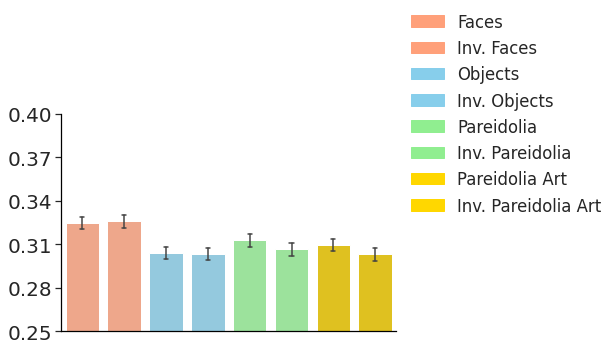

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator
from itertools import cycle

x = "stim_folder"
y = "sp_corr"

# Filter the DataFrame based on the 'Time' condition
subset_df = df_sorted

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

'''
# List of slightly paler shades of pastel colors with opacity
paler_pastel_red = '#FFA07A' + 'FF'  # Paler red pastel with 50% opacity
paler_pastel_blue = '#87CEEB' + 'FF'  # Paler blue pastel with 50% opacity
paler_pastel_green = '#90EE90' + 'FF'  # Paler green pastel with 50% opacity
paler_pastel_orange = '#FFD700' + 'FF'  # Paler orange pastel with 50% opacity

colors=[paler_pastel_red, paler_pastel_red, paler_pastel_blue, paler_pastel_blue, 
        paler_pastel_green, paler_pastel_green, paler_pastel_orange, paler_pastel_orange]


# Create the barplot with the modified palette and hatch styles
ax = sns.barplot(data=subset_df, x=x, y=y, palette=colors, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars

# Apply hatch patterns to every 2nd bar using Matplotlib
bars = plt.gca().patches
hatch = '/'  # Define the hatch pattern
for i, bar in enumerate(bars):
    if i % 2 != 0:  # Check if it's the 2nd bar
        bar.set_hatch(hatch)

# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['Faces', 'Inv. Faces', 'Objects', 'Inv. Objects', 'Pareidolia', 'Inv. Pareidolia', 'Pareidolia Art', 'Inv. Pareidolia Art']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, hatch=hatch, label=label) for color, label in zip(colors, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='20', loc='center left', bbox_to_anchor=(1, 1), frameon=False)

'''

# List of slightly paler shades of pastel colors with opacity
paler_pastel_red = '#FFA07A' + 'FF'  # Paler red pastel with 100% opacity
paler_pastel_blue = '#87CEEB' + 'FF'  # Paler blue pastel with 100% opacity
paler_pastel_green = '#90EE90' + 'FF'  # Paler green pastel with 100% opacity
paler_pastel_orange = '#FFD700' + 'FF'  # Paler orange pastel with 100% opacity

# Create a list of colors for each bar
colors = [paler_pastel_red, paler_pastel_red, paler_pastel_blue, paler_pastel_blue,
          paler_pastel_green, paler_pastel_green, paler_pastel_orange, paler_pastel_orange]


# Create the barplot with the modified palette and hatch styles
ax = sns.barplot(data=subset_df, x=x, y=y, palette=colors, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars

# Remove top and right plot edges
sns.despine()

# Define explicit legend handles with colors and hatches
legend_labels = ['Faces', 'Inv. Faces', 'Objects', 'Inv. Objects', 'Pareidolia', 'Inv. Pareidolia', 'Pareidolia Art', 'Inv. Pareidolia Art']
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=color, label=label, hatch='/')  # Assuming '/' hatch for all bars
    for color, label in zip(colors, legend_labels)
]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='20', loc='center left', bbox_to_anchor=(1, 1), frameon=False)


# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.25, .4)
ax.set_yticks(np.linspace(0.25, .4, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
#ax.set_ylabel('CNN-MEG correlation \n [Spearman\'s r]', fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=20)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
#ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('dg3_hg_37_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


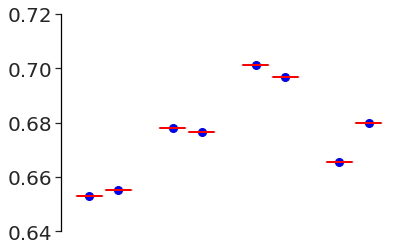

In [53]:


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Define the coordinates of the points
#points = [(0, 0.65848415), (1, 0.66244022), (2, 0.6887755), (3, 0.68575089),
#          (4, 0.71138706), (5, 0.70385152), (6, 0.66669943), (7, 0.68197076)]

#with first fix
#points = [(-0.175, 0.65848415), (0.175, 0.66244022), (0.825, 0.6887755), (1.175, 0.68575089),
#          (1.825, 0.71138706), (2.175, 0.70385152), (2.825, 0.66669943), (3.175, 0.68197076)]

#[-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175]

#no first fix
points = [(-0.175, 0.653083), (0.175, 0.65536395), (0.825, 0.67817691), (1.175, 0.67669987),
          (1.825, 0.7011507), (2.175, 0.69688672), (2.825, 0.66543631), (3.175, 0.67983264)]


# Plot each point with a thick dot and a short line segment passing through it
for x, y in points:
    plt.plot(x, y, marker='o', markersize=8, color='blue', linestyle='None')
    plt.plot([x-0.15, x+0.15], [y, y], color='red', linestyle='-', linewidth=2)

# Set y-axis limits and ticks
plt.ylim(0.64, 0.72)  # Adjusted y-axis limits
plt.yticks([0.64, 0.66, 0.68, 0.7, 0.72], fontsize=20)  # Increase font size

# Remove x-axis labels
plt.xticks([])

# Remove spines except the left one
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show tick marks on the y-axis
plt.tick_params(tick1On=True)
plt.savefig('dg3_hg_38_2.png', dpi= 600, bbox_inches='tight')
# Show the plot
plt.show()




In [ ]:
print("Length of x:", len(subset_df[x]))
print("Length of y:", len(subset_df[y]))

In [ ]:
loaded_df_csv

In [60]:
df_agg_hg = loaded_df_csv

In [61]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()

x = []


for i in range(len(df_agg_hg)):
    
    stim_folder_name = df_agg_hg['stim_folder'][i]
    stim_image_name = df_agg_hg['stim_name'][i]
        
    #folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/'
    
    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name + '.tif')
    #create_folder(os.path.join(folder_path, stim_folder_name))

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (1200, 1200))  
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # centerbias_template = np.zeros((1024, 1024))
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0,0]
    
    x.append(a)
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    # plt.savefig(os.path.join('DG2_heatmaps', '{0}.jpg'.format(i)))
    
    
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    #axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[1].set_axis_off()
    axs[2].matshow(df_agg_hg['hg'][i])
    #axs[2].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[2].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[2].set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name + '.png'))
    #plt.show()
    plt.close()
    '''
    
    #break

Loaded pretrained weights for efficientnet-b5


Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


RuntimeError: CUDA out of memory. Tried to allocate 330.00 MiB (GPU 0; 19.62 GiB total capacity; 17.46 GiB already allocated; 35.38 MiB free; 18.30 GiB reserved in total by PyTorch)

In [5]:
len(x)

256

In [6]:
# Add the Spearman correlation values to the DataFrame
df_agg_hg['dg2'] = x

In [56]:
df_agg_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  
0    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
1    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
2    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
3    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
4    gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
..                                                 ...  
251  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
252  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
253  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
254  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  
255  gASVhQAAAAAAAACMFW51bXB5LmNvcmUubXVsdGlhcnJheZ...  

[256 rows x 3 columns]

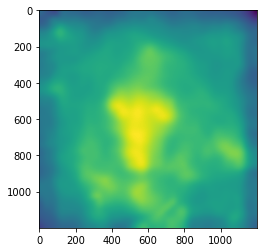

In [11]:
plt.imshow(df_agg_hg['dg2'][0])

In [12]:


# Define a function to serialize the 2D arrays
def serialize_array(arr):
    return base64.b64encode(pickle.dumps(arr)).decode('utf-8')

# Apply the serialization function to the column
df_agg_hg['hg'] = df_agg_hg['hg'].apply(serialize_array)

# Apply the serialization function to the column
df_agg_hg['dg2'] = df_agg_hg['dg2'].apply(serialize_array)

# Save the DataFrame to a CSV file
df_agg_hg.to_csv('/raid/pranjul/agg_hg_dg2_38_subs_c.csv', index=False)

In [2]:
import base64

# Load the DataFrame from the CSV file
loaded_df_csv = pd.read_csv('/raid/pranjul/agg_hg_dg2_38_subs_c.csv')

# Define a function to deserialize the 2D arrays
def deserialize_array(serialized_arr):
    return pickle.loads(base64.b64decode(serialized_arr.encode('utf-8')))

# Apply the deserialization function to the column
loaded_df_csv['hg'] = loaded_df_csv['hg'].apply(deserialize_array)

# Apply the deserialization function to the column
loaded_df_csv['dg2'] = loaded_df_csv['dg2'].apply(deserialize_array)

# Now, loaded_df contains the original DataFrame with 2D arrays in 'Array_Column'

In [4]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  
0    [[-19.93076457390265, -19.93076457390265, -19....  
1    [[-20.211706554634592, -20.211706554634592, -2...  
2    [[-18.99151507223307, -18.99151507223307, -19....  
3    [[-19.153439997303785, -19.153439997303785, -1...  
4    [[-19.593251054700445, -19.593251054700445, -1...  
..                                                 ...  
251  [[-19.050094282300535, -19.050094282300535, -1...  
252  [[-19.20552649252614, -19.20552649252614, -19....  
253  [[-19.593265423580505, -19.593265423580505, -1...  
254  [[-18.886519666205615, -18.886519666205615, -1...  
255  [[-19.379200253494467, -19.379200253494467, -1...  

[256 rows x 4 columns]

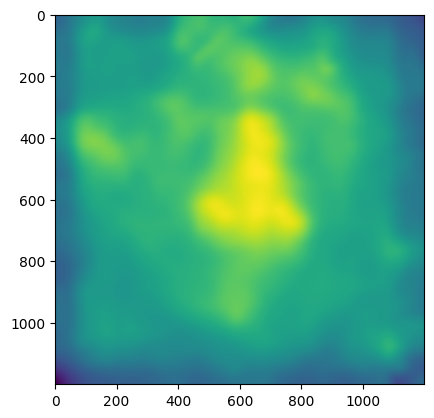

In [9]:
plt.imshow(np.rot90(loaded_df_csv['dg2'].iloc[0], 2))

In [22]:
sp_corr_dg2 = []
for i in range(len(loaded_df_csv)):
    sp_corr_dg2.append(spearmanr(loaded_df_csv['hg'][i].flatten(), np.rot90(loaded_df_csv['hg'][i], 2).flatten())[0])
    #break

In [23]:
loaded_df_csv['sp_corr_hg_up_hg_inv'] = sp_corr_dg2

In [24]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  p_corr_dg2_hg_upright  \
0    [[-19.93076457390265, -19.93076457390265, -19....               0.579527   
1    [[-20.211706554634592, -20.211706554634592, -2...               0.570499   
2    [[-18.99151507223307, -18.99151507223307, -19....               0.623269   
3    [[-19.153439997303785, -19.153439997303785, -1...               0.605416   
4    [[-19.593251054700445, -19.593251054700445, -1...               0.453008   
..                                                 ...                    ...   
251  [[-19.050094282300535, -19.050094282300535, -1...               0.498378   
252  [[-19.20552649252614, -19.20552649252614, -19....               0.507228   
253  [[-19.593265423580505, -19.593265423580505, -1...               0.586464   
254  [[-18.886519666205615, -18.886519666205615, -1...               0.513330   
255  [[-19.379200253494467, -19.379200253494467, -1...               0.550516   

     sp_corr_dg2_hg_upright  sp_corr_dg2_up_dg2_inv  p_corr_dg2_up_dg2_inv  \
0                  0.578695                0.656332               0.707451   
1                  0.696949                0.721876               0.678699   
2                  0.709339                0.664742               0.693846   
3                  0.764074                0.812309               0.741871   
4                  0.537453                0.440443               0.447278   
..                      ...                     ...                    ...   
251                0.678470                0.642409               0.662268   
252                0.709110                0.823059               0.836617   
253                0.683993                0.712679               0.724927   
254                0.677505                0.880398               0.875864   
255                0.750913                0.754621               0.796633   

     p_corr_hg_up_hg_inv  sp_corr_hg_up_hg_inv  
0               0.391247              0.459553  
1               0.093626              0.212059  
2               0.272108              0.238647  
3               0.063920              0.619705  
4               0.080020              0.477319  
..                   ...                   ...  
251             0.618678              0.717354  
252             0.820735              0.524972  
253             0.566366              0.384645  
254             0.551472              0.624245  
255             0.103749              0.275310  

[256 rows x 10 columns]

In [25]:
loaded_df_csv = loaded_df_csv.drop(columns=['dg2', 'hg'])

In [26]:
loaded_df_csv

stim_folder stim_name  p_corr_dg2_hg_upright  sp_corr_dg2_hg_upright  \
0             faces    face01               0.579527                0.578695   
1             faces    face02               0.570499                0.696949   
2             faces    face03               0.623269                0.709339   
3             faces    face04               0.605416                0.764074   
4             faces    face05               0.453008                0.537453   
..              ...       ...                    ...                     ...   
251  pareidolia_inv    75_inv               0.498378                0.678470   
252  pareidolia_inv    78_inv               0.507228                0.709110   
253  pareidolia_inv    80_inv               0.586464                0.683993   
254  pareidolia_inv    81_inv               0.513330                0.677505   
255  pareidolia_inv    83_inv               0.550516                0.750913   

     sp_corr_dg2_up_dg2_inv  p_corr_dg2_up_dg2_inv  p_corr_hg_up_hg_inv  \
0                  0.656332               0.707451             0.391247   
1                  0.721876               0.678699             0.093626   
2                  0.664742               0.693846             0.272108   
3                  0.812309               0.741871             0.063920   
4                  0.440443               0.447278             0.080020   
..                      ...                    ...                  ...   
251                0.642409               0.662268             0.618678   
252                0.823059               0.836617             0.820735   
253                0.712679               0.724927             0.566366   
254                0.880398               0.875864             0.551472   
255                0.754621               0.796633             0.103749   

     sp_corr_hg_up_hg_inv  
0                0.459553  
1                0.212059  
2                0.238647  
3                0.619705  
4                0.477319  
..                    ...  
251              0.717354  
252              0.524972  
253              0.384645  
254              0.624245  
255              0.275310  

[256 rows x 8 columns]

In [27]:
loaded_df_csv.to_csv('c_data.csv', index=False)

In [ ]:
import pandas as pd

# Create two sample dataframes
data1 = {'SharedColumn': [1, 2, 3, 4, 5],
         'Data1_Column': ['A', 'B', 'C', 'D', 'E']}
df1 = pd.DataFrame(data1)

data2 = {'SharedColumn': [1, 1, 2, 2, 3],
         'Data2_Column': [10, 20, 30, 40, 50]}
df2 = pd.DataFrame(data2)

# Merge dataframes based on the shared column
merged_df = pd.merge(df1, df2, on='SharedColumn', how='outer')

# Divide the dataframes based on unique values in the 'SharedColumn'
unique_values_df1 = merged_df[merged_df['Data2_Column'].isnull()].drop('Data2_Column', axis=1)
repeated_values_df2 = merged_df[merged_df['Data1_Column'].notnull()].drop('Data1_Column', axis=1)

# Display the results
print("Unique Values in df1:")
print(unique_values_df1)

print("\nRepeated Values in df2:")
print(repeated_values_df2)


In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(loaded_df_csv, df_sh, on='stim_folder', how='outer')

In [76]:
loaded_df_csv['hg'][0].shape

(1200, 1200)

In [71]:
sp_corr_dg2 = []
for i in range(len(loaded_df_csv)):
    sp_corr_dg2.append(spearmanr(loaded_df_csv['dg2'][i].flatten(), loaded_df_csv['hg'][i].flatten())[0])
    #break

In [72]:
# Add the Spearman correlation values to the DataFrame
loaded_df_csv['sp_corr_dg2'] = sp_corr_dg2

In [73]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  sp_corr_dg2  
0    [[-19.93076457390265, -19.93076457390265, -19....     0.578695  
1    [[-20.211706554634592, -20.211706554634592, -2...     0.696949  
2    [[-18.99151507223307, -18.99151507223307, -19....     0.709339  
3    [[-19.153439997303785, -19.153439997303785, -1...     0.764074  
4    [[-19.593251054700445, -19.593251054700445, -1...     0.537453  
..                                                 ...          ...  
251  [[-19.050094282300535, -19.050094282300535, -1...     0.678470  
252  [[-19.20552649252614, -19.20552649252614, -19....     0.709110  
253  [[-19.593265423580505, -19.593265423580505, -1...     0.683993  
254  [[-18.886519666205615, -18.886519666205615, -1...     0.677505  
255  [[-19.379200253494467, -19.379200253494467, -1...     0.750913  

[256 rows x 5 columns]

In [77]:
loaded_df_csv = loaded_df_csv.drop(columns=['dg2', 'hg'])

In [78]:
loaded_df_csv

stim_folder stim_name  sp_corr_dg2
0             faces    face01     0.578695
1             faces    face02     0.696949
2             faces    face03     0.709339
3             faces    face04     0.764074
4             faces    face05     0.537453
..              ...       ...          ...
251  pareidolia_inv    75_inv     0.678470
252  pareidolia_inv    78_inv     0.709110
253  pareidolia_inv    80_inv     0.683993
254  pareidolia_inv    81_inv     0.677505
255  pareidolia_inv    83_inv     0.750913

[256 rows x 3 columns]

In [79]:
loaded_df_csv['stim_folder'].value_counts()

pareidolia_art        32
pareidolia_inv        32
objects               32
pareidolia_art_inv    32
pareidolia            32
objects_inv           32
faces                 32
faces_inv             32
Name: stim_folder, dtype: int64

In [80]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
loaded_df_csv['stim_folder'] = pd.Categorical(loaded_df_csv['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
df_sorted = loaded_df_csv.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(df_sorted)

            stim_folder        stim_name  sp_corr_dg2
0                 faces           face01     0.578695
31                faces           face32     0.629828
30                faces           face31     0.741536
29                faces           face30     0.649465
28                faces           face29     0.650816
..                  ...              ...          ...
218  pareidolia_art_inv  par_gaze_27_inv     0.687964
219  pareidolia_art_inv  par_gaze_28_inv     0.714883
220  pareidolia_art_inv  par_gaze_29_inv     0.778118
222  pareidolia_art_inv  par_gaze_31_inv     0.719018
223  pareidolia_art_inv  par_gaze_32_inv     0.655606

[256 rows x 3 columns]


In [81]:
df_sorted

stim_folder        stim_name  sp_corr_dg2
0                 faces           face01     0.578695
31                faces           face32     0.629828
30                faces           face31     0.741536
29                faces           face30     0.649465
28                faces           face29     0.650816
..                  ...              ...          ...
218  pareidolia_art_inv  par_gaze_27_inv     0.687964
219  pareidolia_art_inv  par_gaze_28_inv     0.714883
220  pareidolia_art_inv  par_gaze_29_inv     0.778118
222  pareidolia_art_inv  par_gaze_31_inv     0.719018
223  pareidolia_art_inv  par_gaze_32_inv     0.655606

[256 rows x 3 columns]

In [ ]:
df_sorted_sh = pd.merge(df_sorted, df_sh, on='stim_folder', how='outer')

In [ ]:
df_sorted_sh

In [ ]:
# Divide Column1 by Column2
df_sorted_sh['sh_corrected'] = df_sorted_sh['sp_corr_dg2'] / df_sorted_sh['sp_corr_splt_hlf']

In [ ]:
df_sorted_sh

X-coordinates of the centers of the bars:
[-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175]


<Figure size 432x288 with 0 Axes>

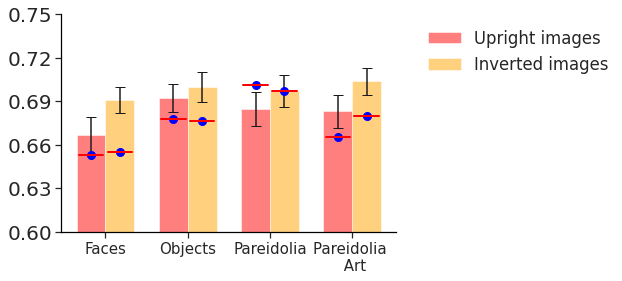

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Example data (replace these arrays with your own)
data = [
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'faces']['sp_corr_dg2'])),  # Group 1 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'objects']['sp_corr_dg2'])),  # Group 2 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia']['sp_corr_dg2'])),  # Group 3 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_art']['sp_corr_dg2']))   # Group 4 data
]

# Example additional data (replace these arrays with your own)
additional_data = [
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'faces_inv']['sp_corr_dg2'])),  # Group 1 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'objects_inv']['sp_corr_dg2'])),  # Group 2 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_inv']['sp_corr_dg2'])),  # Group 3 data
    np.array(np.array(df_sorted[df_sorted['stim_folder'] == 'pareidolia_art_inv']['sp_corr_dg2'])),   # Group 4 data
]


# Combine the data arrays
all_data = [data, additional_data]

# Calculate means and standard deviations for each set of data
means = [[np.mean(group) for group in dataset] for dataset in all_data]
std_devs = [[np.std(group) / np.sqrt(len(group)) for group in dataset] for dataset in all_data]

# Bar chart with error bars using one standard deviation
fig, ax = plt.subplots()
bar_width = 0.35  # Width of the bars
bar_positions = np.arange(len(means[0]))  # Positions for the bars

# Plot the first set of data
bars1 = ax.bar(bar_positions - bar_width / 2, means[0], yerr=std_devs[0], capsize=5, label='Upright images', width=bar_width, color=['red', 'red', 'red', 'red'], alpha=0.5)

# Plot the second set of data
bars2 = ax.bar(bar_positions + bar_width / 2, means[1], yerr=std_devs[1], capsize=5, label='Inverted images', width=bar_width, color=['orange', 'orange', 'orange', 'orange'], alpha=0.5)



# Define the x-coordinates of the centers of the bars
x_coordinates = []

# Iterate over the bars and extract their center x-coordinates
for bar1, bar2 in zip(bars1, bars2):
    x1 = bar1.get_x() + bar1.get_width() / 2
    x2 = bar2.get_x() + bar2.get_width() / 2
    x_coordinates.extend([x1, x2])

print("X-coordinates of the centers of the bars:")
print(x_coordinates)


#with first fix
#points = [(-0.175, 0.65848415), (0.175, 0.66244022), (0.825, 0.6887755), (1.175, 0.68575089),
#          (1.825, 0.71138706), (2.175, 0.70385152), (2.825, 0.66669943), (3.175, 0.68197076)]

#[-0.175, 0.175, 0.825, 1.175, 1.825, 2.175, 2.825, 3.175]

#no first fix
points = [(-0.175, 0.653083), (0.175, 0.65536395), (0.825, 0.67817691), (1.175, 0.67669987),
          (1.825, 0.7011507), (2.175, 0.69688672), (2.825, 0.66543631), (3.175, 0.67983264)]


# Plot each point with a thick dot and a short line segment passing through it
for x, y in points:
    plt.plot(x, y, marker='o', markersize=8, color='blue', linestyle='None')
    plt.plot([x-0.15, x+0.15], [y, y], color='red', linestyle='-', linewidth=2)


# Adding x-axis labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Faces', 'Objects', 'Pareidolia', 'Pareidolia \n Art'], fontsize=15)

# Increase y-axis label font size
ax.yaxis.label.set_size(20)

# Increase y-axis tick label font size
ax.yaxis.set_tick_params(labelsize=20)

# Adding a legend
#ax.legend(fontsize=20)

# Set y-axis limits from 0 to 1
ax.set_ylim(0.6, .75)
ax.set_yticks(np.linspace(0.6, .75, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('')
ax.set_xlabel('')

# Get the current axes
ax = plt.gca()

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set font size for tick labels
#ax.tick_params(axis='both', labelsize=12)

# Move the legend outside of the plot frame
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)


plt.savefig('dg2e_hg_38.png', dpi= 600, bbox_inches='tight')


# Show the plot
plt.show()






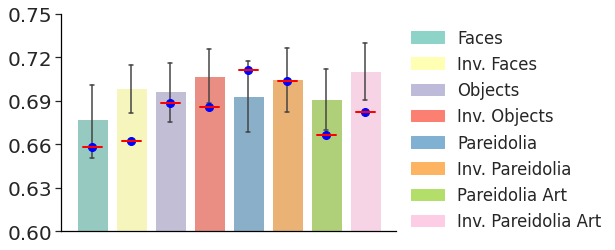

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator

x = "stim_folder"
y = "sp_corr_dg2"

# Filter the DataFrame based on the 'Time' condition
subset_df = df_sorted

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

# Create a palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(subset_df[x].unique()))  # You can choose any other colormap

# Create the barplot with the distinct color palette
ax = sns.barplot(data=subset_df, x=x, y=y, palette=palette, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars
# ax = sns.boxplot(data=subset_df, x=x, y=y, palette=palette)  # Added capsize and errwidth for error bars

'''
# Add statistical annotations
annot = Annotator(ax, combinations_list, data=subset_df, x=x, y=y)
annot.new_plot(ax, combinations_list,
               data=subset_df, x=x, y=y)
annot.configure(test='Kruskal', text_format='star', loc='outside',
                comparisons_correction="fdr_bh",
                hide_non_significant=True,
                #pvalue_thresholds=[[1e-3, '∗∗∗'], [1e-2, "∗∗"], [0.05, "∗"]], 
                pvalue_thresholds=[[1e-3, " "], [1e-2, "  "], [0.05, "  "]], 
                verbose=2)




#annot.apply_test()

# Adjust the position of stars between lines
#annot.line_offset_to_group = 0.5
#annot.line_offset = 0.3  # Adjust this value to move the stars closer to the lines
#annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
#ax, test_results = annot.annotate(line_offset = 0.01)
#ax, test_results = annot.annotate()

ax, test_results = annot.apply_test().annotate(line_offset=0.2)

# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=16)



# Remove x-axis ticks and labels
#ax.set_xticks([])
#ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.9, 1.1)
ax.set_yticks(np.linspace(0.9, 1.1, num=11))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('S-H corrected DG2E & HG correlation \n [Spearman\'s r]', fontsize=16)
#ax.set_ylabel('')
#ax.set_xlabel('2 (orientation)  x 4 (stimuli condition)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
#ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


annot.apply_test()

# Adjust the position of stars between lines
annot.line_offset_to_group = 0.0
annot.line_offset = 0.03  # Adjust this value to move the stars closer to the lines
annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
annot.line_height = 0
ax, test_results = annot.annotate(line_offset_to_group=0)
#ax, test_results = annot.annotate()
'''
# Define the coordinates of the points
points = [(0, 0.65848415), (1, 0.66244022), (2, 0.6887755), (3, 0.68575089),
          (4, 0.71138706), (5, 0.70385152), (6, 0.66669943), (7, 0.68197076)]

# Plot each point with a thick dot and a short line segment passing through it
for x, y in points:
    plt.plot(x, y, marker='o', markersize=8, color='blue', linestyle='None')
    plt.plot([x-0.25, x+0.25], [y, y], color='red', linestyle='-', linewidth=2)


# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['Faces', 'Inv. Faces', 'Objects', 'Inv. Objects', 'Pareidolia', 'Inv. Pareidolia', 'Pareidolia Art', 'Inv. Pareidolia Art']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='20', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Draw horizontal lines
#ax.axhline(0.21, color='grey', linestyle='--', label='nc_1')
#ax.axhline(0.33, color='grey', linestyle='--', label='nc_2')

# Fill the area between the lines
#ax.fill_betweenx(y=[meg_160_nc[0][0], meg_160_nc[0][1]], x1=ax.get_xlim()[0], x2=ax.get_xlim()[1], color='lightgrey', alpha=0.3, label='Filled Area')


# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.6, .75)
ax.set_yticks(np.linspace(0.6, .75, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
#ax.set_ylabel('CNN-MEG correlation \n [Spearman\'s r]', fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=20)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
#ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)

plt.savefig('dg2e_hg_37.png', dpi= 600, bbox_inches='tight')

# Show the plot
plt.show()



In [ ]:
# Get all unique values in the 'sub' column
unique_subs = df['sub'].unique()
unique_subs

In [ ]:
# Randomly shuffle the unique values
np.random.shuffle(unique_subs)
unique_subs

In [ ]:
# Calculate the index to split at (half of the unique values)
split_index = len(unique_subs) // 2
split_index

In [ ]:
# Select the first half of unique values
selected_subs_df1 = unique_subs[:split_index]
selected_subs_df1

In [ ]:
# Split the DataFrame into two based on the selected unique values
df1 = df[df['sub'].isin(selected_subs_df1)]
df2 = df[~df['sub'].isin(selected_subs_df1)]

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1_hg = df1.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

# Rename the column 'old_col_name' to 'new_col_name'
df1_hg = df1_hg.rename(columns={'hg': 'hg_1'})
df1_hg

In [ ]:
df2_hg = df2.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

# Rename the column 'old_col_name' to 'new_col_name'
df2_hg = df2_hg.rename(columns={'hg': 'hg_2'})
df2_hg

In [ ]:
# Merge the DataFrames based on 'stim_folder' and 'stim_name'
merged_df = pd.merge(df1_hg, df2_hg, on=['stim_folder', 'stim_name'], how='inner')

# Display the resulting merged DataFrame
print(merged_df)

In [ ]:
plt.imshow(merged_df['hg_1'][1])

In [ ]:
plt.imshow(merged_df['hg_2'][1])

In [ ]:
sp_corr_splt_hlf = []
for i in range(len(merged_df)):
    sp_corr_splt_hlf.append(spearmanr(merged_df['hg_1'][i].flatten(), merged_df['hg_2'][i].flatten())[0])
    #break

In [ ]:
# Add the Spearman correlation values to the DataFrame
merged_df['sp_corr_splt_hlf'] = sp_corr_splt_hlf

In [ ]:
merged_df = merged_df.drop(columns=['hg_1', 'hg_2'])

In [ ]:
merged_df

In [ ]:
merged_df = merged_df.groupby('stim_folder')['sp_corr_splt_hlf'].mean().reset_index()
merged_df

In [ ]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
merged_df['stim_folder'] = pd.Categorical(merged_df['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
merged_df_sorted = merged_df.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(merged_df_sorted)

In [ ]:
# Extract the 'sp_corr_splt_hlf' column and save it to a NumPy array
sp_corr_splt_hlf_array = merged_df_sorted['sp_corr_splt_hlf'].to_numpy()

In [ ]:
sp_corr_splt_hlf_array

In [48]:
# Number of times to perform the bootstrap sampling
num_iterations = 50
sp_corr_splt_hlf_array = []

for _ in range(num_iterations):

    # Get all unique values in the 'sub' column
    unique_subs = df['sub'].unique()
    #print(unique_subs)

    # Randomly shuffle the unique values
    np.random.shuffle(unique_subs)
    print(unique_subs)

    # Calculate the index to split at (half of the unique values)
    split_index = len(unique_subs) // 2
    #print(split_index)

    # Select the first half of unique values
    selected_subs_df1 = unique_subs[:split_index]
    #selected_subs_df1

    # Split the DataFrame into two based on the selected unique values
    df1 = df[df['sub'].isin(selected_subs_df1)]
    df2 = df[~df['sub'].isin(selected_subs_df1)]

    df1_hg = df1.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

    # Rename the column 'old_col_name' to 'new_col_name'
    df1_hg = df1_hg.rename(columns={'hg': 'hg_1'})
    #df1_hg

    df2_hg = df2.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

    # Rename the column 'old_col_name' to 'new_col_name'
    df2_hg = df2_hg.rename(columns={'hg': 'hg_2'})
    #df2_hg

    # Merge the DataFrames based on 'stim_folder' and 'stim_name'
    merged_df = pd.merge(df1_hg, df2_hg, on=['stim_folder', 'stim_name'], how='inner')

    # Display the resulting merged DataFrame
    #print(merged_df)

    sp_corr_splt_hlf = []
    for i in range(len(merged_df)):
        sp_corr_splt_hlf.append(spearmanr(merged_df['hg_1'][i].flatten(), merged_df['hg_2'][i].flatten())[0])
        #break

    # Add the Spearman correlation values to the DataFrame
    merged_df['sp_corr_splt_hlf'] = sp_corr_splt_hlf

    merged_df = merged_df.drop(columns=['hg_1', 'hg_2'])

    merged_df = merged_df.groupby('stim_folder')['sp_corr_splt_hlf'].mean().reset_index()

    # Define the custom order
    custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

    # Convert the 'stim_folder' column to a Categorical data type with the custom order
    merged_df['stim_folder'] = pd.Categorical(merged_df['stim_folder'], categories=custom_order, ordered=True)

    # Sort the DataFrame based on the custom order
    merged_df_sorted = merged_df.sort_values(by='stim_folder')

    # Print the sorted DataFrame
    #print(merged_df_sorted)

    # Extract the 'sp_corr_splt_hlf' column and save it to a NumPy array
    sp_corr_splt_hlf_array.append(merged_df_sorted['sp_corr_splt_hlf'].to_numpy())

print(sp_corr_splt_hlf_array)


['S34' 'S28' 'S07' 'S17' 'S36' 'S29' 'S09' 'S24' 'S33' 'S38' 'S03' 'S35'
 'S15' 'S14' 'S16' 'S39' 'S08' 'S37' 'S05' 'S23' 'S32' 'S25' 'S21' 'S02'
 'S22' 'S04' 'S27' 'S20' 'S10' 'S18' 'S13' 'S40' 'S31' 'S06' 'S26' 'S11'
 'S19' 'S30']
['S32' 'S17' 'S40' 'S20' 'S22' 'S21' 'S37' 'S30' 'S35' 'S27' 'S04' 'S15'
 'S14' 'S23' 'S34' 'S09' 'S02' 'S38' 'S24' 'S03' 'S31' 'S16' 'S06' 'S36'
 'S25' 'S13' 'S33' 'S26' 'S10' 'S39' 'S07' 'S05' 'S28' 'S18' 'S08' 'S29'
 'S11' 'S19']
['S07' 'S15' 'S14' 'S37' 'S35' 'S24' 'S08' 'S23' 'S32' 'S25' 'S36' 'S34'
 'S30' 'S31' 'S06' 'S11' 'S21' 'S02' 'S33' 'S10' 'S18' 'S05' 'S20' 'S19'
 'S26' 'S28' 'S03' 'S39' 'S27' 'S09' 'S13' 'S38' 'S17' 'S29' 'S22' 'S40'
 'S16' 'S04']
['S35' 'S28' 'S04' 'S34' 'S19' 'S24' 'S16' 'S09' 'S23' 'S37' 'S20' 'S17'
 'S18' 'S13' 'S14' 'S02' 'S32' 'S15' 'S06' 'S36' 'S31' 'S05' 'S03' 'S22'
 'S29' 'S10' 'S21' 'S38' 'S26' 'S07' 'S33' 'S39' 'S08' 'S40' 'S11' 'S30'
 'S25' 'S27']
['S33' 'S06' 'S26' 'S34' 'S31' 'S17' 'S14' 'S39' 'S23' 'S28' 'S10' '

['S05' 'S21' 'S10' 'S15' 'S03' 'S23' 'S34' 'S19' 'S29' 'S20' 'S39' 'S40'
 'S17' 'S02' 'S37' 'S25' 'S04' 'S22' 'S18' 'S30' 'S14' 'S27' 'S26' 'S24'
 'S08' 'S31' 'S32' 'S06' 'S13' 'S35' 'S07' 'S33' 'S11' 'S38' 'S28' 'S09'
 'S36' 'S16']
['S10' 'S26' 'S09' 'S17' 'S16' 'S36' 'S20' 'S29' 'S32' 'S13' 'S28' 'S21'
 'S08' 'S22' 'S23' 'S14' 'S30' 'S06' 'S27' 'S19' 'S25' 'S38' 'S02' 'S39'
 'S24' 'S18' 'S11' 'S03' 'S37' 'S05' 'S35' 'S33' 'S31' 'S40' 'S04' 'S34'
 'S15' 'S07']
['S24' 'S02' 'S27' 'S17' 'S33' 'S18' 'S13' 'S07' 'S09' 'S04' 'S32' 'S38'
 'S37' 'S22' 'S21' 'S06' 'S34' 'S10' 'S15' 'S31' 'S39' 'S05' 'S40' 'S11'
 'S16' 'S26' 'S08' 'S25' 'S35' 'S23' 'S29' 'S28' 'S20' 'S19' 'S30' 'S03'
 'S36' 'S14']
['S27' 'S04' 'S23' 'S37' 'S29' 'S19' 'S24' 'S14' 'S31' 'S40' 'S18' 'S02'
 'S17' 'S22' 'S15' 'S38' 'S39' 'S28' 'S10' 'S16' 'S06' 'S21' 'S30' 'S11'
 'S05' 'S25' 'S13' 'S09' 'S07' 'S20' 'S35' 'S34' 'S26' 'S03' 'S36' 'S32'
 'S08' 'S33']
['S29' 'S40' 'S38' 'S16' 'S21' 'S36' 'S30' 'S09' 'S04' 'S37' 'S07' '

In [49]:
np.mean(sp_corr_splt_hlf_array, axis=0)

array([0.653083  , 0.65536395, 0.67817691, 0.67669987, 0.7011507 ,
       0.69688672, 0.66543631, 0.67983264])

In [ ]:
len(sp_corr_splt_hlf_array)

In [51]:
from tabulate import tabulate

mapping = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
values = [0.65848415, 0.66244022, 0.6887755 , 0.68575089, 0.71138706, 0.70385152, 0.66669943, 0.68197076]

array_result = np.array(values)

table = list(zip(mapping, array_result))
headers = ["with first fix", "S-H rho"]

print(tabulate(table, headers=headers))

with first fix        S-H rho
------------------  ---------
faces                0.658484
faces_inv            0.66244
objects              0.688775
objects_inv          0.685751
pareidolia           0.711387
pareidolia_inv       0.703852
pareidolia_art       0.666699
pareidolia_art_inv   0.681971


In [52]:
from tabulate import tabulate

mapping = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
values = [0.653083, 0.65536395, 0.67817691, 0.67669987, 0.7011507 , 0.69688672, 0.66543631, 0.67983264]

array_result = np.array(values)

table = list(zip(mapping, array_result))
headers = ["no first fix", "S-H rho"]

print(tabulate(table, headers=headers))

no first fix          S-H rho
------------------  ---------
faces                0.653083
faces_inv            0.655364
objects              0.678177
objects_inv          0.6767
pareidolia           0.701151
pareidolia_inv       0.696887
pareidolia_art       0.665436
pareidolia_art_inv   0.679833


In [ ]:
# Given data
mapping = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
values = [0.64045339, 0.63962363, 0.65247639, 0.64685355, 0.69212828, 0.68226111, 0.63446804, 0.64820666]

# Create a DataFrame
df_sh = pd.DataFrame({'stim_folder': mapping, 'sp_corr_splt_hlf': values})

# Print the DataFrame
print(df_sh)

In [ ]:

correlation_coef_objects_iter_img = []

for keys in y_objects:
    mmm = []
    print(keys)
    for i in range(len(y_objects_subs)):
        if y_objects_subs[i][0][0] == keys:
            mmm.append(y_objects_subs[i][1])
            #print(y_faces_subs[i][1])

    # Number of times to perform the bootstrap sampling
    num_iterations = 50
    correlation_coef_objects_iter = []

    for _ in range(num_iterations):

        # Define your dataset
        dataset = list(range(len(mmm)))

        # Perform bootstrap sampling without replacement until no dataset is left
        bootstrap_samples = []
        correlation_coef_objects = []

        while dataset:
            bootstrap_sample = random.sample(dataset, len(dataset))
            bootstrap_samples.append(bootstrap_sample)
            dataset = [x for x in dataset if x not in bootstrap_sample]

        # Print the bootstrap samples
        #for i, sample in enumerate(bootstrap_samples):
        #    print(f"Bootstrap Sample {k + 1}: {sample}")
        
        temp1 = []
        temp2 = []

        for i in bootstrap_samples[0][:int(len(bootstrap_samples[0])/2)]:
            temp1.append(mmm[i])

        for i in bootstrap_samples[0][int(len(bootstrap_samples[0])/2):]:
            temp2.append(mmm[i])

        #print(temp1)
        temp1 = np.mean(temp1, axis=0)
        temp2 = np.mean(temp2, axis=0)
            
            #plt.matshow(mmm[sample[i]])
            #plt.matshow(mmm[sample[i+1]])
        correlation_coef_objects.append(spearmanr(temp1.flatten(),
                                                temp2.flatten())[0])

        correlation_coef_objects_iter.append(np.mean(correlation_coef_objects))
        
        #break
        

    correlation_coef_objects_iter_img.append(np.mean(correlation_coef_objects_iter))
        
    #break
    